<a href="https://colab.research.google.com/github/jonatasnepomuceno/data-science-house-rocket/blob/main/house_hocket_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
##IMPORTS
import pandas as pd 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
import numpy as np
from matplotlib import pyplot as plt #função para desenhar gráfico
import plotly.express as px #para fazer o mapa
#NOVAS QUESTÕES A SEREM RESPONDIDAS


In [3]:
##CARREGANDO DADOS
uri = "https://raw.githubusercontent.com/jonatasnepomuceno/data-science-house-rocket/main/kc_house_data.csv"
data = pd.read_csv(uri)
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
# 1) Qual o número de imóveis por ano de construção?

#contar o número de ids por ano de construção
data[['id', 'yr_built']].groupby('yr_built').count()

,id
yr_built,
1900,87
1901,29
1902,27
1903,46
1904,45
...,...
2011,130
2012,170
2013,201


In [20]:
# 2) Qual o menor número de quartos por ano de construção de imóveis? 

#Filtrar todos os imóveis por ano de contrução e selecionar o menor número de quartos
data[['bedrooms', 'yr_built']].groupby('yr_built').min()

,bedrooms
yr_built,
1900,1
1901,2
1902,2
1903,1
1904,2
...,...
2011,1
2012,2
2013,2


In [21]:
# 3) Qual o preço de compra mais alto por cada número de quarto?

#Filtrar todos os imóveis por número de quartos e selecionar o de maior preço
data[['price', 'bedrooms']].groupby('bedrooms').max()

,price
bedrooms,
0,1295650.0
1,1247000.0
2,3278000.0
3,3800000.0
4,4489000.0
5,7062500.0
6,7700000.0
7,3200000.0
8,3300000.0


In [30]:
# 4) Qual a soma de todos os preços de compra por número de quartos?

#Filtrar todos os imóveis por número de quartos e somar todos os preços
data[['price', 'bedrooms']].groupby('bedrooms').sum()

,price
bedrooms,
0,5323550.00
1,63210934.00
2,1107788602.00
3,4580263939.00
4,4372957028.00
5,1259346326.00
6,224541613.00
7,36145017.00
8,14366000.00


In [31]:
# 5) Qual a soma de todos os preços de compra por número de quartos e banheiros?

#Filtrar todos os imóveis por número de quartos e banheiros e somar todos os preços
data[['price', 'bedrooms', 'bathrooms']].groupby(['bedrooms', 'bathrooms']).sum()               

price
bedrooms bathrooms           
0        0.00      3642600.00
         0.75       265000.00
         1.00       228000.00
         1.50       288000.00
         2.50       899950.00
...                       ...
10       2.00       650000.00
         3.00       660000.00
         5.25      1148000.00
11       3.00       520000.00
33       1.75       640000.00

[144 rows x 1 columns]

In [32]:
# 6) Qual o tamanho médio das salas dos imóveis por ano de construção?

# Filtrar por ano de construção e fazer a média do tamanho das salas
data[['sqft_living', 'yr_built']].groupby('yr_built').mean()

,sqft_living
yr_built,
1900,1732.01
1901,1763.62
1902,1919.63
1903,1507.74
1904,1603.18
...,...
2011,2313.68
2012,2378.74
2013,2636.59


In [33]:
# 7) Qual o tamanho mediano das salas dos imóveis por ano de contrução?

# Filtrar por ano de construção e fazer a mediana do tamanho das salas
data[['sqft_living', 'yr_built']].groupby('yr_built').median()

,sqft_living
yr_built,
1900,1540.00
1901,1610.00
1902,1600.00
1903,1505.00
1904,1280.00
...,...
2011,2270.00
2012,2237.50
2013,2580.00


In [34]:
# 8) Qual o desvio-padrão do tamanho das salas dos imóveis por ano de construção?

# Filtrar por ano de construção e fazer a o desvio-padrão do tamanho das salas
data[['sqft_living', 'yr_built']].groupby('yr_built').std()

,sqft_living
yr_built,
1900,732.94
1901,668.23
1902,878.66
1903,469.72
1904,1076.87
...,...
2011,804.86
2012,771.43
2013,883.50


In [35]:
# 9) Como é o crescimento médio de preços de compras dos imóveis, por anor, por dia e pela semana do ano?

#filtrar todos os imóveis por ano e fazer um gráfico onde o eixo x tenha o ano e  o y eu tenha a média do preço do ano.
#estudar uma biblioteca que tenha alguma função que desenhe um gráfico de linhas

<BarContainer object of 2 artists>

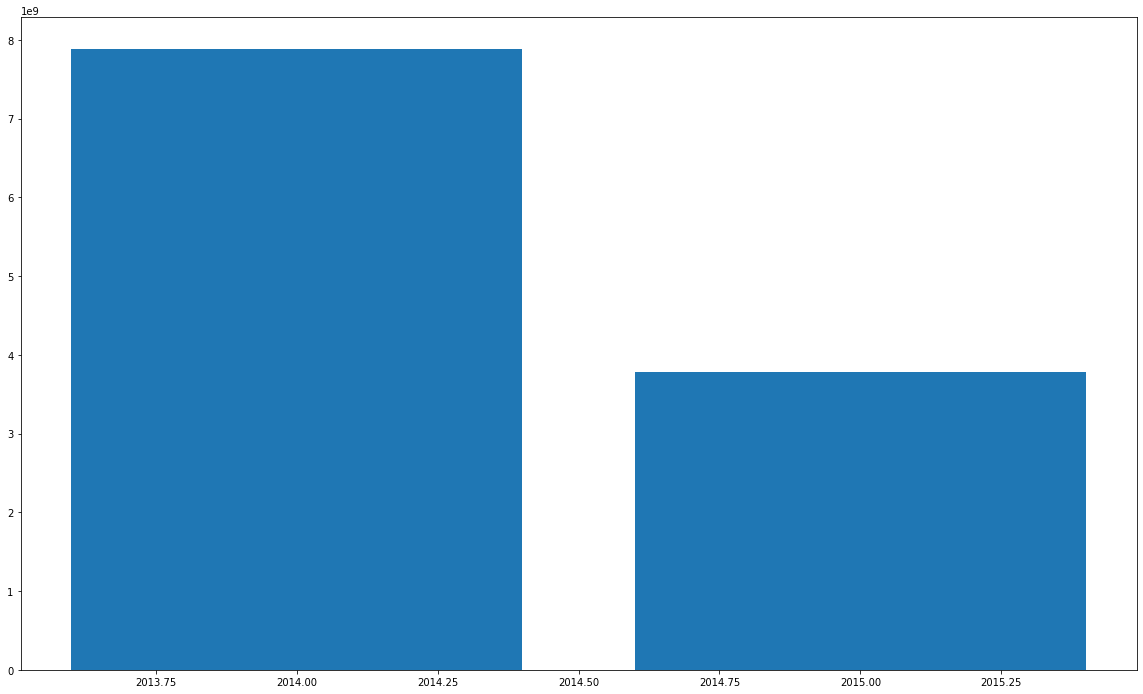

In [42]:
##Crescimento total de preços de compras dos imóveis por ano
data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price', 'year']].groupby('year').sum().reset_index()

plt.figure(figsize=(20,12))
plt.bar(by_year['year'] ,by_year['price'])


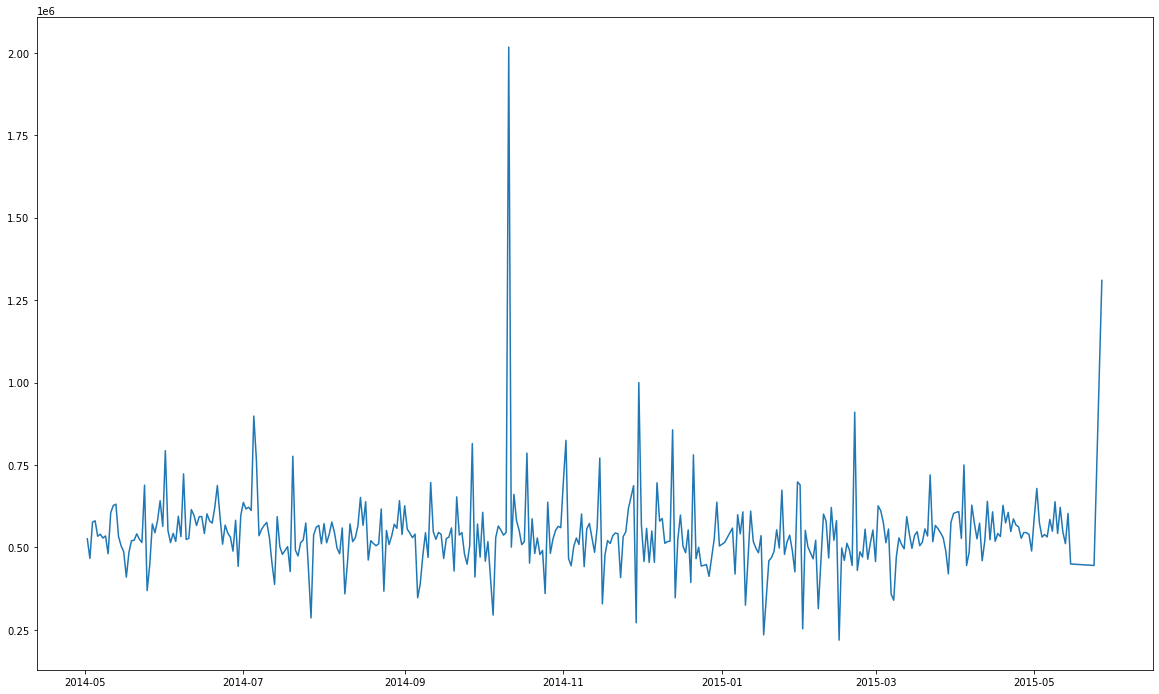

In [44]:
##Crescimento total de preços de compras dos imóveis por dia
data['day'] = pd.to_datetime(data['date'])
by_day = data[['price', 'day']].groupby('day').mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(by_day['day'] ,by_day['price'])


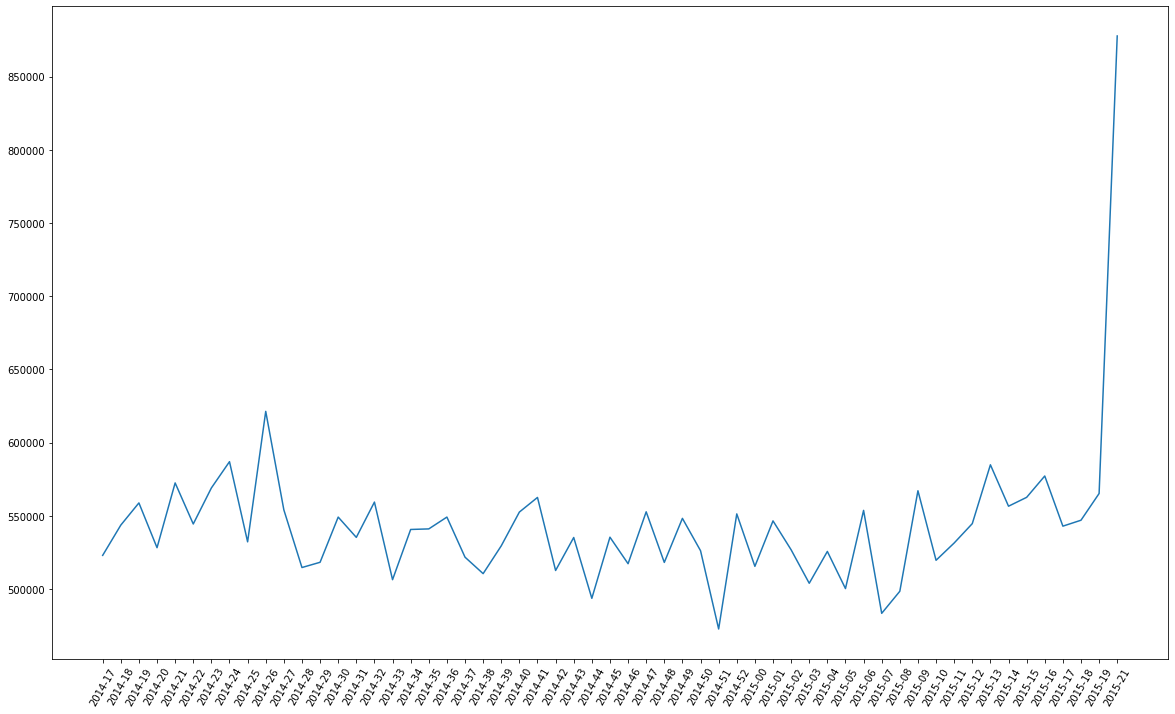

In [48]:
##Crescimento total de preços de compras dos imóveis por semana
data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()

plt.figure(figsize=(20,12))
plt.plot(by_year_week['year_week'] ,by_year_week['price'])
plt.xticks(rotation=60);

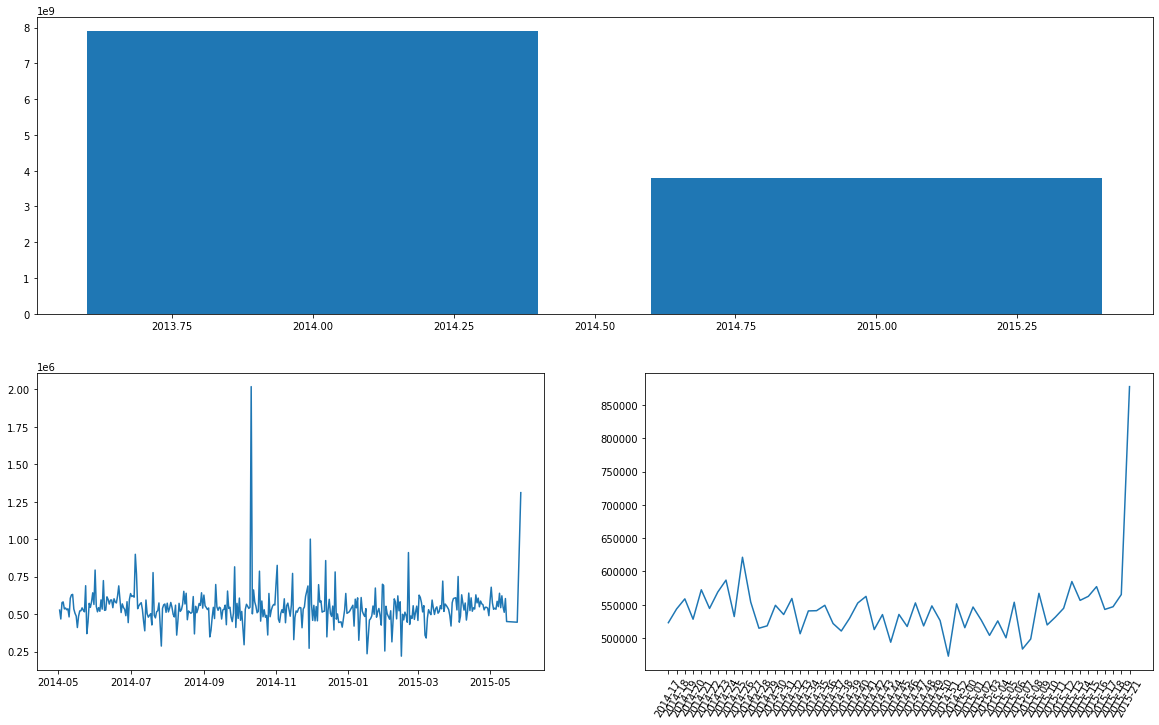

In [49]:
#dash dos gráficos acima

from matplotlib import gridspec

fig = plt.figure (figsize=(20, 12))
specs = gridspec.GridSpec( ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot( specs[0, :]) #primeria linha
ax2 = fig.add_subplot( specs[1, 0]) #segunda linha, primeira coluna
ax3 = fig.add_subplot( specs[1, 1]) #segunda linha, segunda coluna

#primero gráfico
data['year'] = pd.to_datetime(data['date']).dt.year
by_year = data[['price', 'year']].groupby('year').sum().reset_index()
ax1.bar(by_year['year'] ,by_year['price'])

#segundo gráfico
data['day'] = pd.to_datetime(data['date'])
by_day = data[['price', 'day']].groupby('day').mean().reset_index()
ax2.plot(by_day['day'] ,by_day['price'])

data['year_week'] = pd.to_datetime(data['date']).dt.strftime('%Y-%U')
by_year_week = data[['price', 'year_week']].groupby('year_week').mean().reset_index()
ax3.plot(by_year_week['year_week'] ,by_year_week['price'])
plt.xticks(rotation=60);

In [54]:
# 10) Modificar mapa para identificar as casas com o maior preço
data_mapa = data[['id', 'lat', 'long', 'price']]
mapa = px.scatter_mapbox(data_mapa, 
                        lat='lat',
                        lon='long',
                        size='price',
                        color_continuous_scale=px.colors.cyclical.IceFire,
                        size_max=15,
                        zoom=8 )
mapa.update_layout(mapbox_style='open-street-map')
mapa.show()
mapa.write_html('sample_data/mapa_dates.html')
